In [26]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reads the adjacency matrix from file
A = np.loadtxt('adjacency.txt')
print(f'There are {A.shape[0]} nodes in the graph.')

There are 328 nodes in the graph.


In [27]:
#create the edgelist
n=A.shape[0]
edge_list=pd.DataFrame(columns=['user1','user2'])
for i in np.arange(0,n):
    for j in np.arange(0,n):
        if A[i,j]==1:
            edge_list= edge_list.append({'user1' : i, 'user2' : j},ignore_index = True)

In [10]:
edge_list.head()

,user1,user2
0,0,16
1,0,27
2,0,46
3,0,50
4,0,62


In [11]:
import networkx as nx

In [13]:
G=nx.from_pandas_edgelist(edge_list,source='user1',target='user2',create_using=nx.DiGraph())

In [31]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 328
Number of edges: 19338
Average in degree:  58.9573
Average out degree:  58.9573


In [33]:
print(nx.is_connected(G.to_undirected()))

True


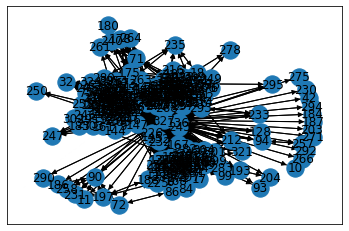

In [15]:
nx.draw_networkx(G)

In [20]:
sizes=[x[1]*3 for x in G.degree()]

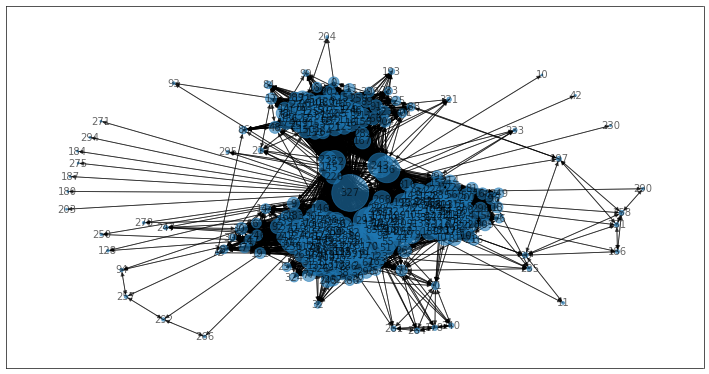

In [24]:
fig = plt.figure(1, figsize=(15, 8), dpi=60)
nx.draw_networkx(G,node_size=sizes,alpha=0.6,width=1)

In [48]:
degree_dict=dict(G.degree(G.nodes()))
sorted_degree=sorted(degree_dict.items(), key=lambda item: item[1],reverse=True)
print('Top 20 nodes by degree:')
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
(327, 654)
(47, 344)
(136, 338)
(243, 290)
(98, 290)
(291, 274)
(3, 270)
(12, 264)
(85, 254)
(177, 252)
(215, 252)
(45, 250)
(108, 248)
(13, 248)
(200, 238)
(199, 236)
(80, 234)
(252, 232)
(58, 232)
(83, 228)


In [50]:
eigenvector_dict=nx.eigenvector_centrality(G)
sorted_degree=sorted(eigenvector_dict.items(), key=lambda item: item[1],reverse=True)
print('Top 20 nodes by eigenvector centrality:')
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by eigenvector centrality:
(327, 0.17153932798767857)
(47, 0.14258686334459944)
(98, 0.12250065436602924)
(291, 0.11845911807103399)
(12, 0.11740436437665482)
(3, 0.11430659336025002)
(85, 0.11391170329946787)
(215, 0.11200581376759149)
(108, 0.11155157326503641)
(45, 0.10917036745717794)
(177, 0.10709790295282551)
(13, 0.10542801433271495)
(200, 0.10330688611439806)
(136, 0.10173227284859482)
(199, 0.10112876841981108)
(58, 0.1010513692441425)
(5, 0.098821951767373)
(80, 0.09684144345616225)
(83, 0.09522846229563171)
(265, 0.09373696513081413)


In [28]:
nx.density(G) 

0.18029760572835085

We can observe there are three clusters. But the network graph is not very clear because of too many datapoints.

As you can see above, the adjacency matrix is relatively large (328x328): there are 328 persons in the graph. We can visualize it as a single image. This plots the 328x328 image where the pixel (i,j) is black if and only if A[i,j]=1.

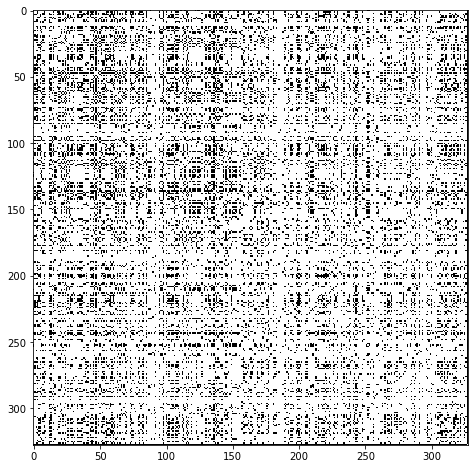

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(A,aspect='equal',cmap='Greys',  interpolation='none')

**(a)** Construct in the cell below the degree matrix:
$$
D_{i,i} = {\rm deg}(i) \qquad \text{and} \qquad D_{i,j} = 0 \ \ \text{if} \ i \neq j,
$$
the Laplacian matrix:
$$
L = D - A
$$
and the normalized Laplacian matrix:
$$
L_{\rm norm} = D^{-1/2} L D^{-1/2}.
$$

In [12]:
degrees=A.sum(axis=1)
D=np.diag(degrees)
L=D-A
from scipy.linalg import fractional_matrix_power
L_norm=fractional_matrix_power(D,-1/2)@L@fractional_matrix_power(D,-1/2)
L_norm

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.01064251],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.00606998],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.01628656, -0.00685914],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.00680698],
       [ 0.        ,  0.        , -0.01628656, ...,  0.        ,
         1.        , -0.00726126],
       [-0.01064251, -0.00606998, -0.00685914, ..., -0.00680698,
        -0.00726126,  1.        ]])

**(b)** Compute the eigenvalues and the eigenvectors of $L_{\rm norm}$.

In [16]:
eigenvalue, eigenvector=np.linalg.eigh(L_norm)

**(c)** We would like to cluster the nodes (i.e. the users) in 3 groups. Using the eigenvectors of $L_{\rm norm}$, assign to each node a point in $\mathbb{R}^2$. 

In [24]:
eig_decomp={}
for i in np.arange(0,len(eigenvalue),1):
    key=eigenvalue[i]
    value=eigenvector[:,i]
    eig_decomp[key]=value

sorted_eig_decomp=dict(sorted(eig_decomp.items(),reverse=False))
sorted_eig_decomp
lambdas=sorted_eig_decomp.keys()

In [28]:
l2=list(lambdas)[1]
l3=list(lambdas)[2]
v2=eig_decomp[l2]
v3=eig_decomp[l3]

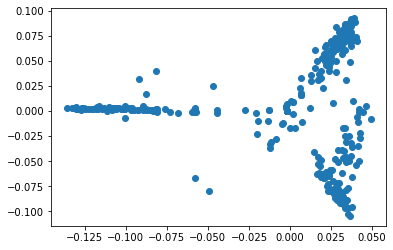

In [29]:
#x coordinates of x1, x2, ..., xn are entries of v2
#y coordinates of x1, x2, ..., xn are entries of v3
x=v2
y=v3
plt.scatter(x,y)

**(d)** Using the K-means algorithm, cluster the embeddings in $\mathbb{R}^2$ of the nodes in 3 groups.

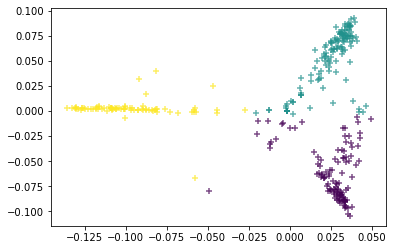

In [36]:
X=[[x,y] for x, y in zip(v2,v3)]
X=np.array(X)

# Each row corresponds to a data point
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels=kmeans.labels_
# labels contains the membership of each node 0,1 or 2

# This colors each point of R^2 according to its label
plt.scatter( x,y, alpha=0.7, marker='+', c = labels)

**(e)** Re-order the adjacency matrix according to the clusters computed in the previous part such that the $n_1$ nodes of the first cluster correspond to the first $n_1$ rows/columns, the $n_2$ nodes of the second cluster correspond to the next $n_2$ rows/columns, and the $n_3$ nodes of the third cluster correspond to the last $n_3$ rows/columns.

In [48]:
labels=list(labels)
label1_index=[i for i in np.arange(0,len(labels))if labels[i]==0 ]
label2_index=[i for i in np.arange(0,len(labels))if labels[i]==1 ]
label3_index=[i for i in np.arange(0,len(labels))if labels[i]==2 ]
new_order=label1_index+label2_index+label3_index

In [50]:
A=A[:, new_order]
A=A[new_order, :]

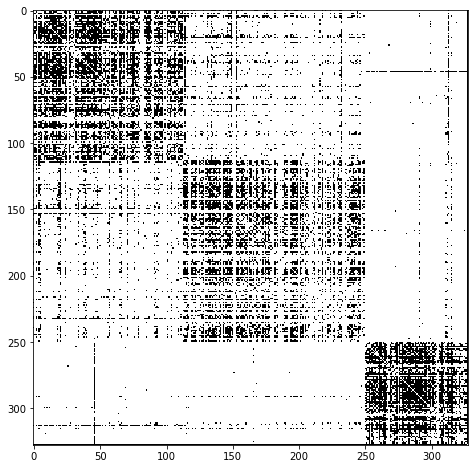

In [51]:
plt.figure(figsize=(8,8))
plt.imshow(A,aspect='equal',cmap='Greys',  interpolation='none')